In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler


In [2]:
# 1. Load a built-in dataset and display first 7 rows
iris = datasets.load_iris(as_frame=True)
df = iris.frame
print("First 7 rows:")
print(df.head(7))

First 7 rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   
5                5.4               3.9                1.7               0.4   
6                4.6               3.4                1.4               0.3   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
5       0  
6       0  


In [4]:
# 2. Function to return dataset shape
def dataset_shape(data):
    return data.shape

print("\nDataset Shape:", dataset_shape(df))


Dataset Shape: (150, 5)


In [5]:
# 3. Train-test split 70/30
train, test = train_test_split(df, test_size=0.3, random_state=42)
print("\nTrain Shape:", train.shape)
print("Test Shape:", test.shape)


Train Shape: (105, 5)
Test Shape: (45, 5)


In [6]:
# 4. Descriptive statistics
print("\nDescriptive Stats:")
print(df.describe().T[["mean", "std"]])
print("Median:")
print(df.median())
print("Variance:")
print(df.var())


Descriptive Stats:
                       mean       std
sepal length (cm)  5.843333  0.828066
sepal width (cm)   3.057333  0.435866
petal length (cm)  3.758000  1.765298
petal width (cm)   1.199333  0.762238
target             1.000000  0.819232
Median:
sepal length (cm)    5.80
sepal width (cm)     3.00
petal length (cm)    4.35
petal width (cm)     1.30
target               1.00
dtype: float64
Variance:
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
target               0.671141
dtype: float64


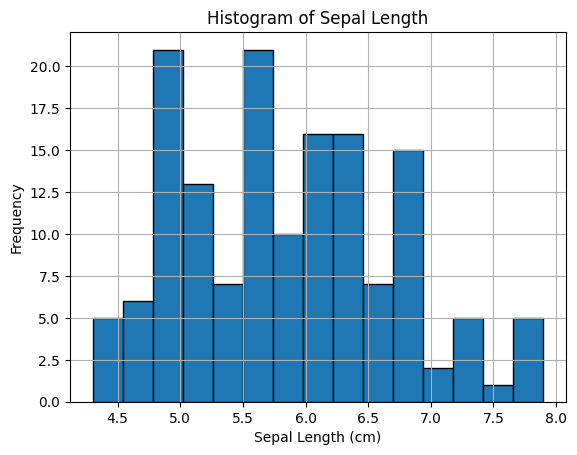

In [7]:
# 5. Histogram for a numerical feature
df['sepal length (cm)'].hist(bins=15, edgecolor='black')
plt.title("Histogram of Sepal Length")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Frequency")
plt.show()

In [8]:
# 6. Mean & Median of list
nums = [5, 8, 12, 7, 15, 20, 3, 9, 11, 14, 6, 18, 2, 10, 16]
print("\nList Mean:", np.mean(nums))
print("List Median:", np.median(nums))


List Mean: 10.4
List Median: 10.0


In [9]:
# 7. Summary function
def list_summary(values):
    return {
        "count": len(values),
        "mean": np.mean(values),
        "min": np.min(values),
        "max": np.max(values),
        "std": np.std(values)
    }

print("\nList Summary:", list_summary(nums))


List Summary: {'count': 15, 'mean': 10.4, 'min': 2, 'max': 20, 'std': 5.238320341483519}


In [10]:
# 8. 6x6 random integer matrix
matrix = np.random.randint(1, 51, size=(6,6))
print("\n6x6 Random Matrix:\n", matrix)


6x6 Random Matrix:
 [[14 44 41 44 24 20]
 [11 19  2 13 26 48]
 [ 3 45 43  1 49 41]
 [12 48 21 17 30 21]
 [32 37 50 48 20 39]
 [ 4 18 33 32 47 31]]


In [11]:
# 9. Load CSV (using Iris dataframe instead, since no file is given)
print("\n.info() summary:")
print(df.info())
print("\n.describe() summary:")
print(df.describe())


.info() summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB
None

.describe() summary:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%       

In [12]:
# 10. Linear Regression
X = df[["sepal length (cm)", "petal length (cm)"]]
y = df["sepal width (cm)"]
model = LinearRegression()
model.fit(X, y)
print("\nLinear Regression Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Linear Regression Coefficients: [ 0.56118597 -0.33526674]
Intercept: 1.0380690570704139


In [13]:
# 11. Min-Max Normalization
scaler = MinMaxScaler()
df["sepal length norm"] = scaler.fit_transform(df[["sepal length (cm)"]])
print("\nFirst 10 normalized values:")
print(df["sepal length norm"].head(10))


First 10 normalized values:
0    0.222222
1    0.166667
2    0.111111
3    0.083333
4    0.194444
5    0.305556
6    0.083333
7    0.194444
8    0.027778
9    0.166667
Name: sepal length norm, dtype: float64


In [14]:
# 12. Group by categorical column (target)
grouped_means = df.groupby("target")["sepal length (cm)"].mean()
print("\nMean Sepal Length per Class:")
print(grouped_means)


Mean Sepal Length per Class:
target
0    5.006
1    5.936
2    6.588
Name: sepal length (cm), dtype: float64


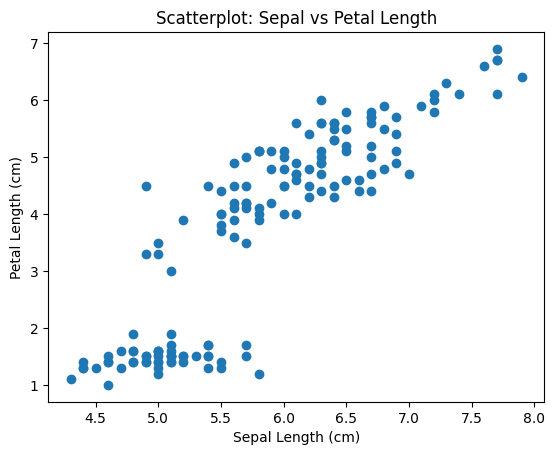

In [15]:
# 13. Scatterplot
plt.scatter(df["sepal length (cm)"], df["petal length (cm)"])
plt.title("Scatterplot: Sepal vs Petal Length")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.show()

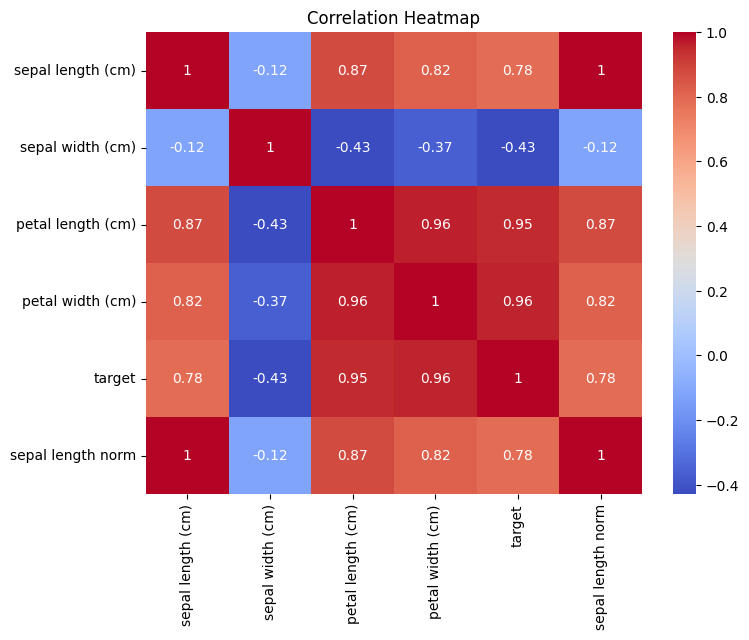

In [16]:
# 14. Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [17]:
# 15. Save cleaned dataset (fill missing values with mean)
df_cleaned = df.fillna(df.mean(numeric_only=True))
df_cleaned.to_csv("cleaned_iris.csv", index=False)
print("\nCleaned dataset saved as 'cleaned_iris.csv'")


Cleaned dataset saved as 'cleaned_iris.csv'
